# Results of grid search on best parameters
This notebook test the results of the grid search evaluating the best models.

In [3]:
%matplotlib inline
project_dir = '../../'
data_dir = project_dir + 'data/'

import sys
sys.path.append(project_dir + 'NN/')

import numpy as np
import importlib
import json
import time
import matplotlib.pyplot as plt
import MLP
import layer
import json
from MLP import MLP, MLP_w
from utils.preprocessing import split,StandardScaler
from utils.results import plot_results, output_correlations
from utils.losses import MSE, MEE

In [4]:
#xavier weight inizialization
def xavier(structure):
    start=np.zeros(len(structure))
    for idx,num in enumerate(structure):
        if idx==0:
            start[idx]=np.sqrt(6)/np.sqrt(structure[idx])
        else:
            start[idx]=np.sqrt(6)/np.sqrt(structure[idx-1]+structure[idx])
    return list(start)

### Load parameters

In [7]:
mypath = '../report/json/'
file = mypath + 'all_dict.json'

with open(file) as json_file:
    grid_results = json.load(json_file) 

### Load the data

In [8]:
raw_data = np.loadtxt("../../data/Data_set.txt")

data_scaler = StandardScaler()
labels_scaler = StandardScaler(kind = 'vector')

raw_data[:,:-2] = data_scaler.fit_transform(raw_data[:,:-2]) 
raw_data[:,-2:] = labels_scaler.fit_transform(raw_data[:,-2:])

#splitting the data from the labels
data=raw_data[:,:-2]
labels=raw_data[:,-2:]

frac_training=0.8
input_data, val_data, train_labels, val_labels=split(data, labels,kind="hold_out",
                                                     frac_training=frac_training)

In [9]:
# Initialize empty list for errors
tr_MEE_of_best = []
tr_std_of_best = []
val_MEE_of_best = []
val_std_of_best = []

n_best = 5 # Number of models to test
k = 4 # Number of fold for internal k-fold 

for i in range(n_best): # For each model in the bests
    print(f'\nNetw {i}')
    best_model_dict = grid_results[i] # extract model parameters
    train_dict = dict(best_model_dict['train']) # extract train params
    train_dict['verbose'] = True # setting verbose to true

    # Initialize error on single model
    tr_kfold = np.array([])
    val_kfold = np.array([])
    Mse_cand = np.array([])

    for i in range(0,k): # for each fold
        # Initialize the best model
        best_model = MLP_w(**best_model_dict['model'])
        # Split the dataset
        TR_set, VL_set, TR_lab, VL_lab = split(data, labels, kind="k_fold", k = k)
        # Train the model
        best_model.train(TR_set, TR_lab , VL_set, VL_lab, **train_dict)
        
        # predict 
        pred_tr = best_model.predict(TR_set)
        pred_val = best_model.predict(VL_set)
        
        # inverse transform of all
        ori_lab_tr = labels_scaler.inverse_transform(TR_lab)
        ori_lab_val = labels_scaler.inverse_transform(VL_lab)
        ori_pred_tr = labels_scaler.inverse_transform(pred_tr)
        ori_pred_val = labels_scaler.inverse_transform(pred_val)
        
        # compute errors
        tr_Err = MEE(ori_lab_tr, ori_pred_tr)
        val_Err = MEE(ori_lab_val, ori_pred_val)
        
        # append to candidate error list
        tr_kfold = np.append(tr_kfold, tr_Err)
        val_kfold = np.append(val_kfold, val_Err)
    
    # Print the errors of the model
    print('val error : ',np.mean(val_kfold) ,'+/-' ,np.std(val_kfold))
    print('training error :',np.mean(tr_kfold),'+/-',np.std(tr_kfold))
    
    # append the errors of the model and his relative stdev
    tr_MEE_of_best.append(np.mean(tr_kfold))
    tr_std_of_best.append(np.std(tr_kfold))
    
    val_MEE_of_best.append(np.mean(val_kfold))
    val_std_of_best.append(np.std(val_kfold))
    
# turn the list to numpy arrays
val_MEE_of_best = np.array(val_MEE_of_best)
val_std_of_best = np.array(val_std_of_best)
tr_MEE_of_best = np.array(tr_MEE_of_best)
tr_std_of_best = np.array(tr_std_of_best)


Netw 0
Candidate 0
Epoch 1854:  [train MEE = 0.1481]  [val MEE = 0.1555]                              
Elapsed time: 4.117571115493774 s
Candidate 1
Epoch 1627:  [train MEE = 0.1527]  [val MEE = 0.1619]                              
Elapsed time: 3.443075180053711 s
Candidate 2
Epoch 1764:  [train MEE = 0.1479]  [val MEE = 0.1586]                              
Elapsed time: 3.7156472206115723 s
Candidate 0
Epoch 2115:  [train MEE = 0.1478]  [val MEE = 0.1566]                              
Elapsed time: 4.518131256103516 s
Candidate 1
Epoch 2925:  [train MEE = 0.1457]  [val MEE = 0.1656]                              
Elapsed time: 6.461923360824585 s
Candidate 2
Epoch 2399:  [train MEE = 0.1416]  [val MEE = 0.1527]                              
Elapsed time: 5.348195791244507 s
Candidate 0
Epoch 4401:  [train MEE = 0.1371]  [val MEE = 0.1661]                              
Elapsed time: 9.861043453216553 s
Candidate 1
Epoch 1864:  [train MEE = 0.1448]  [val MEE = 0.1682]                

Epoch 1208:  [train MEE = 0.1490]  [val MEE = 0.1549]                              
Elapsed time: 4.741331338882446 s
Candidate 0
Epoch 998:  [train MEE = 0.1502]  [val MEE = 0.1580]                              
Elapsed time: 4.185102701187134 s
Candidate 1
Epoch 1671:  [train MEE = 0.1443]  [val MEE = 0.1568]                              
Elapsed time: 7.816502809524536 s
Candidate 2
Epoch 1355:  [train MEE = 0.1465]  [val MEE = 0.1535]                              
Elapsed time: 5.189523220062256 s
Candidate 3
Epoch 1479:  [train MEE = 0.1446]  [val MEE = 0.1593]                              
Elapsed time: 5.300731182098389 s
Candidate 0
Epoch 3002:  [train MEE = 0.1291]  [val MEE = 0.1630]                              
Elapsed time: 11.122189283370972 s
Candidate 1
Epoch 1713:  [train MEE = 0.1423]  [val MEE = 0.1641]                              
Elapsed time: 6.3346476554870605 s
Candidate 2
Epoch 1906:  [train MEE = 0.1362]  [val MEE = 0.1615]                              
Elaps

### Results of best models

In [10]:
for i, (tr, std_tr, v, std_v) in enumerate(zip(tr_MEE_of_best, tr_std_of_best,
                                           val_MEE_of_best, val_std_of_best)):
    print(f'top {i}:')
    print(f'train: {tr:.3f}+-{std_tr:.3f}')
    print(f'val: {v:.3f}+-{std_v:.3f}')

top 0:
train: 1.040+-0.034
val: 1.168+-0.037
top 1:
train: 1.029+-0.023
val: 1.141+-0.018
top 2:
train: 1.037+-0.038
val: 1.154+-0.026
top 3:
train: 1.018+-0.039
val: 1.142+-0.038
top 4:
train: 1.046+-0.045
val: 1.147+-0.026


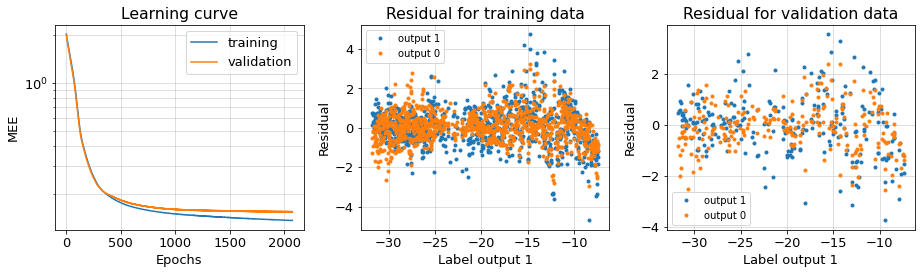

final train error: 1.0048187467572562
final val error: 1.1474616797051567


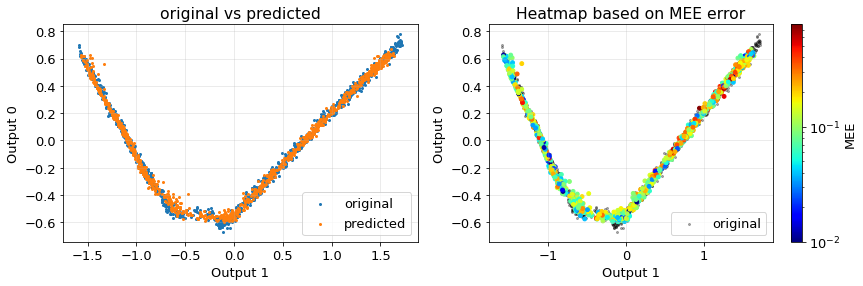

In [12]:
plot_results(best_model, input_data, val_data, train_labels, val_labels, 
             norm = labels_scaler.inverse_transform, sortidx = 1
            )
output_correlations(best_model, input_data, train_labels)